In [11]:
import sys
import os

import math
import time
import numpy as np
from PIL import Image
from matplotlib import pyplot
import cv2
from datetime import datetime

import pynq
import dac_sdc
from IPython.display import display

from pynq import Overlay
ol = Overlay('/home/xilinx/jupyter_notebooks/Praeklima /image_inverter_V1.0.bit')

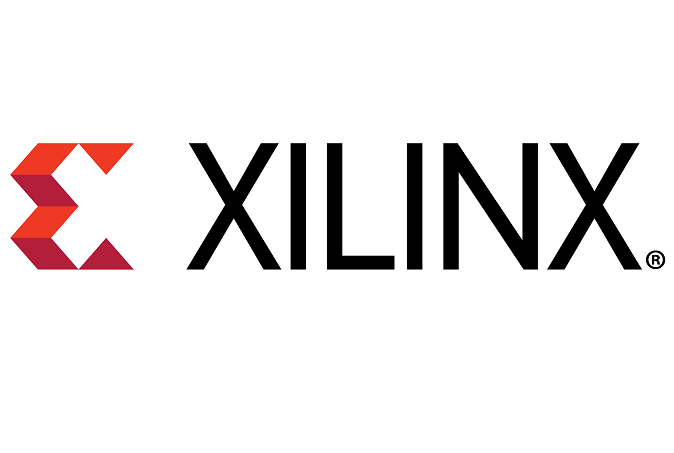

Original image size: 453x674 pixels.


In [4]:
dma = ol.axi_dma_0

interval_time = 0

image_path = '/home/xilinx/jupyter_notebooks/Praeklima /1.jpg'

original_image = Image.open(image_path)
original_array = np.array(original_image)
original_image.close()

original_result = Image.fromarray(original_array)
display(original_result)

old_width, old_height = original_image.size
print("Original image size: {}x{} pixels.".format(old_height, old_width))

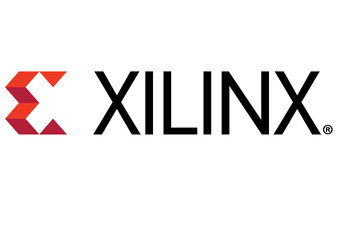

Resized image size: 226x337 pixels.


In [5]:
new_width, new_height = int(old_width/2), int(old_height/2)
original_image = Image.open(image_path)
resized_image = original_image.resize((new_width, new_height), 
                                      Image.ANTIALIAS)
resized_array = np.array(resized_image)
original_image.close()

resize_result = Image.fromarray(resized_array)
display(resize_result)

width, height = resized_image.size
print("Resized image size: {}x{} pixels.".format(height, width))

In [6]:
xlnk = pynq.Xlnk()
in_buffer = xlnk.cma_array(shape=(453, 674, 3), dtype=np.uint8, cacheable = 1)
out_buffer = xlnk.cma_array(shape=(453, 674, 3), dtype=np.uint8, cacheable = 1)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: pynq.Xlnk is deprecated and will be removed in 2.7 - use pynq.allocate instead
  """Entry point for launching an IPython kernel.


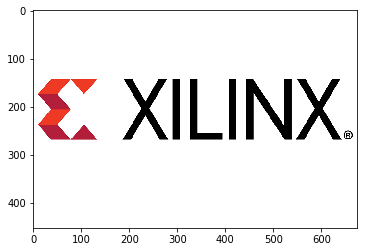

In [7]:
interval_time = 0

image_path = '/home/xilinx/jupyter_notebooks/Praeklima /1.jpg'

bgr_array = cv2.imread(str(image_path))
rgb_array = cv2.cvtColor(bgr_array, cv2.COLOR_BGR2RGB)
in_buffer[:] = rgb_array

pyplot.imshow(in_buffer)
pyplot.show()

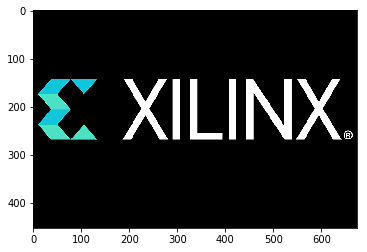

In [8]:
gpio = ol.axi_gpio_0
gpio.channel2.write(1,0x1)

def dma_transfer():
    dma.sendchannel.transfer(in_buffer)
    dma.recvchannel.transfer(out_buffer)    
    dma.sendchannel.wait()
    dma.recvchannel.wait()
    

dma_transfer()
gpio.channel2.write(0,0x1)
pyplot.imshow(out_buffer)
pyplot.show()